In [17]:
import pandas as pd
import numpy as np
import os
import collections
import csv
import random as rn
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from itertools import islice
from scipy.stats import beta as beta

# ------------------------------
# ----- PARAMETERS & SETUP -----
# ------------------------------

dataset_name = "seed_power_law_1"
authors_number = 5
months_number = 1
shuffling = True
shuffle_number = 100
readers_number = 5000
a_readers = .9
n_readers = 1000
papers_number = 5000
a_papers = .9
n_papers = 1000

# Seed folder path

dataset_folder_path = "../data/{}/".format(dataset_name)
dataset_shuffle_folder_path = "../data/{}/shuffle/".format(dataset_name)
dataset_entries_folder_path = "../data/{}/entries/".format(dataset_name)
dataset_plots_folder_path = "../data/{}/plots/".format(dataset_name)
reader_mappings_path = "{}reader_mappings.csv".format(dataset_entries_folder_path)
paper_mappings_path = "{}paper_mappings.csv".format(dataset_entries_folder_path)
rp_matrix_df_csv_path = "{}rp_matrix.csv".format(dataset_entries_folder_path)
ratings_file_path = "{}ratings.csv".format(dataset_entries_folder_path)
authors_file_path = "{}authors.csv".format(dataset_entries_folder_path)
info_file_path = "{}info.csv".format(dataset_entries_folder_path)
stats_file_path = "{}stats.csv".format(dataset_entries_folder_path)

os.makedirs(dataset_folder_path, exist_ok=True)
os.makedirs(dataset_entries_folder_path, exist_ok=True)
os.makedirs(dataset_plots_folder_path, exist_ok=True)

print("DATASET NAME: ", dataset_name)
print("DATASET FOLDER PATH: ", dataset_folder_path)
print("INFO FILE PATH: ", info_file_path)
print("RATINGS FILE PATH: ", ratings_file_path)
print("AUTHORS FILE PATH: ", authors_file_path)

# Functions

# Return first n items of the iterable as a list
def take(n, iterable):
    return list(islice(iterable, n))

def truncated_power_law(a, m):
    x = np.arange(1, m+1, dtype='float')
    pmf = 1/x**a
    pmf /= pmf.sum()
    return stats.rv_discrete(values=(range(1, m+1), pmf))

DATASET NAME:  seed_power_law_1
DATASET FOLDER PATH:  ../data/seed_power_law_1/
INFO FILE PATH:  ../data/seed_power_law_1/entries/info.csv
RATINGS FILE PATH:  ../data/seed_power_law_1/entries/ratings.csv
AUTHORS FILE PATH:  ../data/seed_power_law_1/entries/authors.csv


---------- INTER-READERS DISTRIBUTION GENERATION STARTED ----------
---------- PRINTING EXPECTED POWER LAW FOR READERS ----------
Expected Power Law Plot Saved at Path: ../data/seed_power_law_1/plots/expected-power-law-readers.pdf
Generated Readers: 5050
Distinct Readers Classes: 100 (i.e., m)
Total Amount of Ratings to Give:  200537
Minimum Number of Papers Required: 152
There Are 1 Readers Which Give 251 Ratings
There Are 2 Readers Which Give 183 Ratings
There Are 3 Readers Which Give 154 Ratings
There Are 5 Readers Which Give 136 Ratings
There Are 4 Readers Which Give 132 Ratings
There Are 8 Readers Which Give 128 Ratings
There Are 7 Readers Which Give 126 Ratings
There Are 6 Readers Which Give 122 Ratings
There Are 9 Readers Which Give 113 Ratings
There Are 13 Readers Which Give 108 Ratings
Etc.
---------- INTER-READERS DISTRIBUTION GENERATION COMPLETED ----------


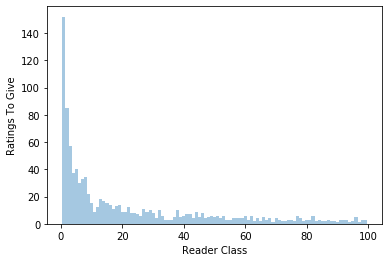

In [18]:
# ------------------------------
# ---- CORE IMPLEMENTATION -----
# ------------------------------

print("---------- INTER-READERS DISTRIBUTION GENERATION STARTED ----------")

res = 0
counter = 0
while res < readers_number:
  res = ((counter * (counter+1))/2)
  counter = counter + 1
counter = counter - 1
m = counter   
readers_number = int(res)
m_readers = m
a = a_readers
d = truncated_power_law(a=a, m=m)
n = n_readers
sample_readers = d.rvs(size=n)
ratings_number = 0
reader_rating_frequency = list(collections.Counter(sample_readers).most_common())[::-1]
for index, (readers_amount, rating_frequency) in enumerate(reader_rating_frequency):
    c = index
    if index > 0:
        while c > 0:
            if rating_frequency == reader_rating_frequency[index][1]:
                rating_frequency = rating_frequency + 1
                reader_rating_frequency[index] = (readers_amount, rating_frequency)
            c = c- 1
reader_rating_frequency = reader_rating_frequency[::-1]
for readers_amount,rating_frequency in reader_rating_frequency:
    ratings_number += readers_amount * rating_frequency
min_papers_number = collections.Counter(sample_readers).most_common()[0][1]

print("---------- PRINTING EXPECTED POWER LAW FOR READERS ----------")
ax = sns.distplot(sample_readers, bins=np.arange(m)+0.5, kde=False)
ax.set(xlabel="Reader Class", ylabel= "Ratings To Give")
fig = ax.get_figure()
path = "{}expected-power-law-readers.pdf".format(dataset_plots_folder_path)
fig.savefig(path, bbox_inches='tight')

print(f"Expected Power Law Plot Saved at Path: {path}")
print(f"Generated Readers: {readers_number}")
print(f"Distinct Readers Classes: {m} (i.e., m)")
print(f"Total Amount of Ratings to Give:  {ratings_number}")
print(f"Minimum Number of Papers Required: {min_papers_number}")
for readers_amount, rating_frequency in take(10, reader_rating_frequency):
    print(f"There Are {readers_amount} Readers Which Give {rating_frequency} Ratings")
print("Etc.")

print("---------- INTER-READERS DISTRIBUTION GENERATION COMPLETED ----------")

---------- INTER-PAPERS DISTRIBUTION GENERATION STARTED ----------
---------- PRINTING EXPECTED POWER LAW FOR PAPERS ----------
Expected Power Law Plot Saved at Path: ../data/seed_power_law_1/plots/expected-power-law-papers.pdf
Generated Papers: 5050
Distinct Papers Classes: 100 (i.e., m)
Minimum Number of Readers Required: 163
There Are 1 Papers Which Receive 255 Ratings
There Are 2 Papers Which Receive 169 Ratings
There Are 3 Papers Which Receive 150 Ratings
There Are 7 Papers Which Receive 124 Ratings
There Are 11 Papers Which Receive 120 Ratings
There Are 4 Papers Which Receive 118 Ratings
There Are 5 Papers Which Receive 116 Ratings
There Are 12 Papers Which Receive 112 Ratings
There Are 8 Papers Which Receive 105 Ratings
There Are 9 Papers Which Receive 102 Ratings
Etc.
---------- INTER-PAPERS DISTRIBUTION GENERATION COMPLETED ----------


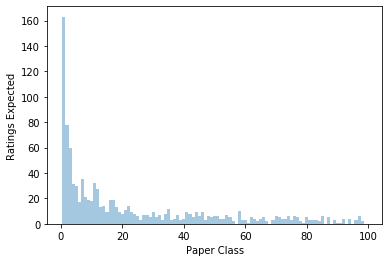

In [19]:
print("---------- INTER-PAPERS DISTRIBUTION GENERATION STARTED ----------")

res = 0
counter = 0
while res < papers_number:
  res = ((counter * (counter+1))/2)
  counter = counter + 1
counter = counter - 1
m = counter    
papers_number = int(res)
m_papers = m
a = a_papers
d = truncated_power_law(a=a, m=m)
n = n_papers
sample_papers = d.rvs(size=n)
paper_rating_frequency = list(collections.Counter(sample_papers).most_common())[::-1]
for index, (papers_amount, rating_frequency) in enumerate(paper_rating_frequency):
    c = index
    if index > 0:
        while c > 0:
            if rating_frequency == paper_rating_frequency[index][1]:
                rating_frequency = rating_frequency + 1
                paper_rating_frequency[index] = (papers_amount, rating_frequency)
            c = c- 1
paper_rating_frequency = paper_rating_frequency[::-1]
min_readers_number = collections.Counter(sample_papers).most_common()[0][1]

print("---------- PRINTING EXPECTED POWER LAW FOR PAPERS ----------")
ax = sns.distplot(sample_papers, bins=np.arange(m)+0.5, kde=False)
ax.set(xlabel="Paper Class", ylabel= "Ratings Expected")
fig = ax.get_figure()
path = "{}expected-power-law-papers.pdf".format(dataset_plots_folder_path)
fig.savefig(path, bbox_inches='tight')
print(f"Expected Power Law Plot Saved at Path: {path}")
print(f"Generated Papers: {papers_number}")
print(f"Distinct Papers Classes: {m_papers} (i.e., m)")
print(f"Minimum Number of Readers Required: {min_readers_number}")
for paper_amount, rating_frequency in take(10, paper_rating_frequency):
    print(f"There Are {paper_amount} Papers Which Receive {rating_frequency} Ratings")
print("Etc.")

print("---------- INTER-PAPERS DISTRIBUTION GENERATION COMPLETED ----------")

---------- READER-PAPER MATRIX GENERATION STARTED ----------
Total Papers: 5050
Building Paper Mappings...
Sampled Papers: 1 Remaining Papers: 5049
Sampled Papers: 2 Remaining Papers: 5047
Sampled Papers: 3 Remaining Papers: 5044
Sampled Papers: 7 Remaining Papers: 5037
Sampled Papers: 11 Remaining Papers: 5026
Sampled Papers: 4 Remaining Papers: 5022
Sampled Papers: 5 Remaining Papers: 5017
Sampled Papers: 12 Remaining Papers: 5005
Sampled Papers: 8 Remaining Papers: 4997
Sampled Papers: 9 Remaining Papers: 4988
Sampled Papers: 17 Remaining Papers: 4971
Sampled Papers: 16 Remaining Papers: 4955
Sampled Papers: 10 Remaining Papers: 4945
Sampled Papers: 6 Remaining Papers: 4939
Sampled Papers: 14 Remaining Papers: 4925
Sampled Papers: 22 Remaining Papers: 4903
Sampled Papers: 13 Remaining Papers: 4890
Sampled Papers: 18 Remaining Papers: 4872
Sampled Papers: 35 Remaining Papers: 4837
Sampled Papers: 21 Remaining Papers: 4816
Sampled Papers: 58 Remaining Papers: 4758
Sampled Papers: 23 R

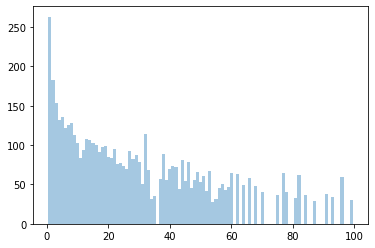

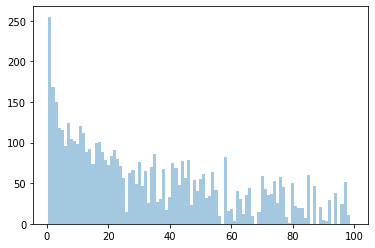

In [20]:
print("---------- READER-PAPER MATRIX GENERATION STARTED ----------")

# Setting up arrays for Readersourcing

readers = np.arange(readers_number)
authors = np.arange(authors_number)
papers = np.arange(papers_number)

rp_matrix = np.zeros_like(np.arange(readers_number * papers_number).reshape(readers_number, papers_number))

paper_mappings = pd.DataFrame(columns=["Paper", "Rating Frequency", "Ratings Received"])
paper_set = set(papers)
paper_sampled = set()
print(f"Total Papers: {len(paper_set)}")

print("Building Paper Mappings...")

for paper_amount, rating_frequency in paper_rating_frequency:
    sample = rn.sample(paper_set, paper_amount)
    for paper_id in sample:
        paper_sampled.add(paper_id)
        paper_set.remove(paper_id)
        paper_mappings = paper_mappings.append({"Paper": paper_id, "Rating Frequency": rating_frequency, "Ratings Received": 0}, ignore_index=True)
    print(f"Sampled Papers: {paper_amount} Remaining Papers: {len(paper_set)}")
    
print("Building Reader Mappings...")
    
reader_mappings = pd.DataFrame(columns=["Reader", "Rating Frequency", "Ratings Given"])
reader_set = set(readers)
print(f"Total Readers: {len(reader_set)}")
for reader_amount, rating_frequency in reader_rating_frequency:
    sample = rn.sample(reader_set, reader_amount)
    for reader_id in sample:
        reader_set.remove(reader_id)
        reader_mappings = reader_mappings.append({"Reader": reader_id, "Rating Frequency": rating_frequency, "Ratings Given": 0}, ignore_index=True)
    #print(f"Sampled Readers: {reader_amount} Remaining Readers: {len(reader_set)}")
       
print("Populating RP-Matrix...")
      
for reader_index, reader_row in reader_mappings.iterrows():
    
    reader_id = reader_row["Reader"]
    ratings_to_give = reader_row["Rating Frequency"]
    ratings_given = reader_row["Ratings Given"]
    #print("Handling {}/{} Readers; ID: {}, Ratings To Give: {}, Ratings Given {}"
    #      .format(reader_index, len(reader_mappings), reader_id, ratings_to_give, ratings_given))
    available_papers = paper_mappings[
        paper_mappings["Ratings Received"] < paper_mappings["Rating Frequency"]
    ].head(ratings_to_give)
        
    while ratings_given < ratings_to_give and len(available_papers) > 0:
        for paper_index, paper_row in available_papers.iterrows():
            paper_id = paper_row["Paper"]
            ratings_to_receive = paper_row["Rating Frequency"]
            ratings_received = paper_row["Ratings Received"]
            if ratings_received < ratings_to_receive:
                rp_matrix[reader_id, paper_id] = 1
                paper_mappings.loc[paper_index, "Ratings Received"] = ratings_received + 1
                reader_mappings.loc[reader_index, "Ratings Given"] = ratings_given + 1
                ratings_given = ratings_given + 1
            
reader_mappings.to_csv(reader_mappings_path)
paper_mappings.to_csv(paper_mappings_path)
rp_matrix_df = pd.DataFrame(dtype=int)
for paper_configuration in rp_matrix:
    rp_matrix_df = rp_matrix_df.append(pd.Series(paper_configuration),ignore_index=True)
rp_matrix_df = rp_matrix_df.astype(int)
rp_matrix_df.to_csv(rp_matrix_df_csv_path)

print("---------- PRINTING TRUE POWER LAW FOR READERS ----------")
temp = []
ratings_given = rp_matrix_df.sum(axis=1)
final_reader_rating_frequency = collections.Counter(ratings_given).most_common()
for index, (readers_amount, rating_frequency) in enumerate(final_reader_rating_frequency):
    temp.append([rating_frequency] * readers_amount)
temp = [item for sublist in temp for item in sublist]
ax = sns.distplot(temp, bins=np.arange(m_readers)+0.5, kde=False)
fig = ax.get_figure()
path_readers = "{}true-power-law-readers.pdf".format(dataset_plots_folder_path)
fig.savefig(path_readers, bbox_inches='tight')
plt.show()
plt.close()

# The true power law papers may be different from the expect one because
# it is not guaranteed that the full amount of papers will be sampled for
# each class; this means that the following instructions will "merge" together
# two or more classes if the same amount of papers have been sampled.
# (i.e, if there are 1 paper with 68 ratings and 1 paper with 5 ratings, the
# true power law will say something like "there are 1 paper which receives 73 ratings

print("---------- PRINTING TRUE POWER LAW FOR PAPERS ----------")
temp = []
ratings_received = rp_matrix_df.sum(axis=0)
final_paper_rating_frequency = collections.Counter(ratings_received).most_common()
for index, (papers_amount, rating_frequency) in enumerate(final_paper_rating_frequency):
    temp.append([rating_frequency] * papers_amount)
temp = [item for sublist in temp for item in sublist]
ax = sns.distplot(temp, bins=np.arange(m_papers)+0.5, kde=False)
fig = ax.get_figure()
path_papers = "{}true-power-law-papers.pdf".format(dataset_plots_folder_path)
fig.savefig(path_papers, bbox_inches='tight')
plt.show()
plt.close()

ratings_number = paper_mappings["Ratings Received"].sum()

print("Ratings Given By Readers (Expected): {}".format(reader_mappings["Ratings Given"].sum()))
print("Ratings Received By Papers (Actual): {}".format(paper_mappings["Ratings Received"].sum()))
print("Reader Mappings Saved at Path: {}".format(reader_mappings_path))
print("Paper Mappings Saved at Path: {}".format(paper_mappings_path))
print("Reader-Paper Matrix Saved at Path: {}".format(rp_matrix_df_csv_path))
print("True Power Law Plot (Readers) Saved at Path: {}".format(path_readers))
print("True Power Law Plot (Papers) Saved at Path: {}".format(path_papers))

print("---------- READER-PAPER MATRIX GENERATION COMPLETED ----------")

In [21]:
print("---------- INTRA-PAPER DISTRIBUTIONS GENERATION STARTED ----------")

generated_configurations = {"0":{},"1":{},"2":{},"3":{},"4":{}}

beta_distributions_frequencies = [(0, int(round((5*papers_number/100))))]
beta_distributions_frequencies.append((1, int(round(30*papers_number/100))))
beta_distributions_frequencies.append((2, int(round(20*papers_number/100))))
beta_distributions_frequencies.append((3, int(round(30*papers_number/100))))
beta_distributions_frequencies.append((4, int(round(15*papers_number/100))))
papers_amount = 0
for (index, papers_amount) in beta_distributions_frequencies:
    papers_amount += papers_amount
while papers_amount < papers_number:
    current_configuration = list(rn.sample(beta_distributions_frequencies, 1)[0])
    current_configuration[1] = current_configuration[1] + 1
    beta_distributions_frequencies[current_configuration[0]] = tuple(current_configuration)
    papers_amount = 0
    for (index, z) in beta_distributions_frequencies:
        papers_amount += z

papers_set = set(papers)
paper_distributions = [None] * papers_number

generated_papers_distributions = 0
for (index, papers_amount) in beta_distributions_frequencies:
    if papers_amount > len(papers_set):
        papers_amount = len(papers_set)
    current_paper_set = rn.sample(papers_set, papers_amount)
    generated_configurations["{}".format(index)]["papers_ids"] = current_paper_set
    generated_configurations["{}".format(index)]["papers_amount"] = papers_amount
    for paper in current_paper_set:
        a = 0
        b = 0
        if index==0:
            # CASE 1: a == b == 1, 5% of papers
            a = 1
            b = 1
        if index==1:
            # CASE 2: a == b > 1, 30% of papers
            a = rn.randint(2, 10)
            b = a
        if index == 2:
            # CASE 3: 0 < (a ^ b) < 1, 30% of papers
            a = rn.uniform(0.3, 1)
            b = rn.uniform(0.001, 1)
        if index == 3:
            # CASE 4: (a V b) == 1, (a > b V b > a), 20% of papers
            a = 1
            b = rn.randint(1, 10)
            if rn.randint(0,1) > 0.5:
                a, b = b, a
        if index == 4:
            # CASE 5: (a ^ b) > 1, (a > b V b > a), 15% of papers
            a = rn.randint(2, 10)
            b = rn.randint(2 + a, 10 + a)
            if rn.randint(0,1) > 0.5:
                a, b = b, a
        percentage = 100*generated_papers_distributions/papers_number
        if percentage % 10 == 0:
            print("{}/{} ({}/100%)".format(int(generated_papers_distributions), papers_number, int(percentage)))
        paper_distributions[paper] = [a, b]
        generated_papers_distributions = generated_papers_distributions + 1
        papers_set.remove(paper)
print("{}/{} (100/100%)".format(papers_number, papers_number))

print("---------- INTRA-PAPER DISTRIBUTIONS GENERATION COMPLETED ----------")

---------- INTRA-PAPER DISTRIBUTIONS GENERATION STARTED ----------
0/5050 (0/100%)
505/5050 (10/100%)
1010/5050 (20/100%)
1515/5050 (30/100%)
2020/5050 (40/100%)
2525/5050 (50/100%)
3030/5050 (60/100%)
3535/5050 (70/100%)
4040/5050 (80/100%)
4545/5050 (90/100%)
5050/5050 (100/100%)
---------- INTRA-PAPER DISTRIBUTIONS GENERATION COMPLETED ----------


In [22]:
print("---------- RATINGS GENERATION STARTED ----------")

generated_ratings = 0
with open(ratings_file_path, mode='w', newline='') as ratings_file:
    ratings_writer = csv.writer(ratings_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    ratings_writer.writerow(['Timestamp', 'Reader', 'Paper', 'Score','Reader-Label'])
    for reader, papers_configuration in rp_matrix_df.iterrows():
        for paper in papers:
            if papers_configuration[paper] == 1:
                paper_distribution = beta(paper_distributions[paper][0],paper_distributions[paper][1])
                percentage = 100*generated_ratings/ratings_number
                if percentage % 10 == 0:
                    print("{}/{} ({}/100%)".format(int(generated_ratings), ratings_number, int(percentage)))
                generated_rating = round(paper_distribution.rvs(1)[0], 2)
                if generated_rating == 0:
                    generated_rating = 0.01
                ratings_writer.writerow([
                    generated_ratings, 
                    reader, 
                    paper, 
                    generated_rating,
                    "R#{}".format(reader)
                ])
                generated_ratings+=1
    print("{}/{} (100/100%)".format(ratings_number, ratings_number))
    
ratings_file.close()

paper_ratings = pd.read_csv(ratings_file_path)
paper_ratings = paper_ratings.sample(frac=1)
paper_ratings["Timestamp"] = range(len(paper_ratings))
paper_ratings.reset_index(drop=True, inplace=True)

paper_ratings.to_csv(ratings_file_path, index=False, header=True, sep=",")

print("Ratings Timeserie Saved at Path: {}".format(ratings_file_path))

print("---------- RATINGS GENERATION ENDED ----------")

---------- RATINGS GENERATION STARTED ----------
0/174169 (0/100%)
174169/174169 (100/100%)
Ratings Timeserie Saved at Path: ../data/seed_power_law_1/entries/ratings.csv
---------- RATINGS GENERATION ENDED ----------


In [23]:
# Authors file generation

print("---------- AUTHORS GENERATION STARTED ----------")

with open(authors_file_path, mode='w', newline='') as authors_file:
    authors_writer = csv.writer(authors_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    authors_writer.writerow(["Author", "Paper"])
    for index, author in enumerate(authors):
        percentage = 100*index/authors_number
        if percentage % 10 == 0:
            print("{}/{} ({}/100%)".format(int(index), authors_number, int(percentage)))
        # An author writes a number of paper between 1 and paper_fraction
        author_papers_number = rn.randint(1, (papers_number-1))
        papers_written = np.random.choice(papers, author_papers_number).tolist()
        papers_written = set(papers_written)
        if len(papers_written) > 1:
            papers_written = map(str, list(papers_written))
            papers_written = ";".join(papers_written)
        else:
            papers_written = list(papers_written)[0]
        authors_writer.writerow([author, papers_written])
    print("{}/{} (100/100%)".format(authors_number, authors_number))
authors_file.close()

print("Authors File Saved at Path: {}".format(authors_file_path))
        
print("---------- AUTHORS GENERATION ENDED ----------")

# Info file generation

print("---------- INFO GENERATION STARTED ----------")

info_dataframe = pd.DataFrame(columns=["Dataset", "Paper", "Reader", "Rating", "Author"])
info_dataframe = info_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Paper": papers_number, 
        "Reader": readers_number, 
        "Rating": ratings_number, 
        "Author": authors_number
    }, ignore_index=True)
info_dataframe.to_csv(info_file_path, index=False)

print("Info File Saved at Path: {}".format(info_file_path))

print("---------- INFO GENERATION ENDED ----------")

---------- AUTHORS GENERATION STARTED ----------
0/5 (0/100%)
1/5 (20/100%)
2/5 (40/100%)
3/5 (60/100%)
4/5 (80/100%)
5/5 (100/100%)
Authors File Saved at Path: ../data/seed_power_law_1/entries/authors.csv
---------- AUTHORS GENERATION ENDED ----------
---------- INFO GENERATION STARTED ----------
Info File Saved at Path: ../data/seed_power_law_1/entries/info.csv
---------- INFO GENERATION ENDED ----------


In [24]:
# Stats file generation

print("---------- STATS GENERATION STARTED ----------")

temp_ratings_dataframe = pd.read_csv(ratings_file_path)
temp_ratings_dataframe = temp_ratings_dataframe.loc[:, temp_ratings_dataframe.columns != "Reader-Label"]
temp_ratings_dataframe[temp_ratings_dataframe.columns] = temp_ratings_dataframe[temp_ratings_dataframe.columns].apply(pd.to_numeric)

stats_dataframe = temp_ratings_dataframe.copy()
stats_dataframe[stats_dataframe > 0.0000001] = 1

print("---------- COMPUTING STATS FOR PAPERS ----------")

sums_paper = stats_dataframe.copy().sum(axis=0)
sums_paper_dataframe = pd.DataFrame(sums_paper)

max_ratings_paper = sums_paper_dataframe.max()
min_ratings_paper = sums_paper_dataframe.min()
mean_ratings_paper = sums_paper_dataframe.mean()

temp_ratings_dataframe = temp_ratings_dataframe.T
paper_counter = 0
for index, row in temp_ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        paper_counter+=1
        
print("---------- COMPUTING STATS FOR READERS ----------")

sums_reader = stats_dataframe.copy().sum(axis=1)
counter=collections.Counter(sums_reader)
sums_reader_dataframe = pd.DataFrame(sums_reader)

max_ratings_reader = sums_reader_dataframe.max()
min_ratings_reader = sums_reader_dataframe.min()
mean_ratings_reader = sums_reader_dataframe.mean()

temp_ratings_dataframe = temp_ratings_dataframe
reader_counter = 0
for index, row in temp_ratings_dataframe.iterrows():
    if len(np.unique(row)) == 1:
        reader_counter+=1
        
# Writing stats to file

stats_dataframe = pd.DataFrame(columns=[
    "Dataset",
    "Max Number Rating Paper", 
    "Min Number Rating Paper", 
    "Mean Number Rating Paper",
    "Number Papers Unique Ratings",
    "Max Number Rating Reader", 
    "Min Number Rating Reader", 
    "Mean Number Rating Reader"
    "Number Readers Unique Rating"
])
stats_dataframe = stats_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Max Number Rating Paper": int(max_ratings_paper.values[0]), 
        "Min Number Rating Paper": int(min_ratings_paper.values[0]), 
        "Number Papers Unique Ratings": paper_counter, 
        "Mean Number Rating Paper": int(mean_ratings_paper.values[0]), 
        "Max Number Rating Reader": int(max_ratings_reader.values[0]), 
        "Min Number Rating Reader": int(min_ratings_reader.values[0]), 
        "Mean Number Rating Reader": int(mean_ratings_reader.values[0]), 
        "Number Readers Unique Rating": reader_counter, 
    }, ignore_index=True)
stats_dataframe.to_csv(stats_file_path, index=False)

print("Stats File Saved at Path: {}".format(stats_file_path))

print("---------- STATS GENERATION COMPLETED ----------")

---------- STATS GENERATION STARTED ----------
---------- COMPUTING STATS FOR PAPERS ----------
---------- COMPUTING STATS FOR READERS ----------
Stats File Saved at Path: ../data/seed_power_law_1/entries/stats.csv
---------- STATS GENERATION COMPLETED ----------


In [25]:
# Data generation for experiments

# ------------------------------
# -- EXP 1-A: DATA GENERATION --
# ------------------------------

print("---------- SPECIAL RATINGS STARTED ----------")

from shutil import copyfile

ratings_file_path_special = "{}ratings_special.csv".format(dataset_entries_folder_path)
info_file_path_special = "{}info_special.csv".format(dataset_entries_folder_path)

copyfile(ratings_file_path, ratings_file_path_special)
copyfile(info_file_path, info_file_path_special)

gaussian_beta_distributions = generated_configurations["2"]
papers_identifiers = gaussian_beta_distributions["papers_ids"]

for paper in papers_identifiers:
    mean = (paper_distributions[paper][0]/(paper_distributions[paper][0] + paper_distributions[paper][1]))
    SR1_rating_id = generated_ratings
    SR1_reader = readers_number
    SR1_paper = paper
    SR1_rating_score = round(mean,2)
    SR1_reader_label = "SR#1"
    SR2_rating_id = generated_ratings+1
    SR2_reader = readers_number+1
    SR2_paper = paper
    SR2_reader_label = "SR#2"
    SR3_rating_id = generated_ratings+2
    SR3_reader = readers_number+2
    SR3_paper = paper
    SR3_reader_label = "SR#3"
    if mean <= 0.5:
        SR2_rating_score = 0.01
        SR3_rating_score = round(((1-mean)/2),2)
    else:
        SR2_rating_score = 1.0
        SR3_rating_score = round((mean/2),2)
    with open(ratings_file_path_special, mode='a', newline='') as ratings_file:
        ratings_writer = csv.writer(ratings_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        ratings_writer.writerow([SR1_rating_id, SR1_reader, SR1_paper, SR1_rating_score, SR1_reader_label])
        ratings_writer.writerow([SR2_rating_id, SR2_reader, SR2_paper, SR2_rating_score, SR2_reader_label])
        ratings_writer.writerow([SR3_rating_id, SR3_reader, SR3_paper, SR3_rating_score, SR3_reader_label])
    ratings_file.close()
    generated_ratings = generated_ratings + 3
ratings_number = generated_ratings
readers_number = readers_number + 3

print("Ratings file with special ratings saved at path: {}".format(ratings_file_path_special))
    
# Updating info file

info_dataframe = pd.DataFrame(columns=["Dataset", "Paper", "Reader", "Rating", "Author"])
info_dataframe = info_dataframe.append(
    {
        "Dataset": dataset_name, 
        "Paper": papers_number, 
        "Reader": readers_number, 
        "Rating": ratings_number, 
        "Author": authors_number
    }, ignore_index=True)
info_dataframe.to_csv(info_file_path_special, index=False)

print("Updated info file saved at path: {}".format(info_file_path_special))

print("---------- SPECIAL RATINGS COMPLETED  ----------")

---------- SPECIAL RATINGS STARTED ----------
Ratings file with special ratings saved at path: ../data/seed_power_law_1/entries/ratings_special.csv
Updated info file saved at path: ../data/seed_power_law_1/entries/info_special.csv
---------- SPECIAL RATINGS COMPLETED  ----------


In [27]:
# ------------------------------
# -- EXP 1-B: DATA GENERATION --
# ------------------------------

print("---------- RATINGS SHUFFLING STARTED ----------")

ratings_file_path = "{}ratings.csv".format(dataset_entries_folder_path)
info_file_path = "{}info.csv".format(dataset_entries_folder_path)

if shuffling:
    paper_ratings = pd.read_csv(ratings_file_path)
    os.makedirs(dataset_shuffle_folder_path, exist_ok=True)
    for s in range(shuffle_number):
        c = 0
        if s % 10 == 0:
            print("{}/{} ({}/100%)".format(s, shuffle_number, s))
        current_shuffle_file_path = "{}/shuffle_{}.csv".format(dataset_shuffle_folder_path, s)
        shuffled_papers_ratings = paper_ratings.sample(frac=1)
        for i, row in shuffled_papers_ratings.iterrows():
            shuffled_papers_ratings.at[i,'Timestamp'] = c
            c  = c + 1
        shuffled_papers_ratings.to_csv(current_shuffle_file_path, index=False, header=True, sep=",")
        
    print("{}/{} (100/100%)".format(shuffle_number, shuffle_number))
    
print("---------- RATINGS SHUFFLING COMPLETED ----------")


---------- RATINGS SHUFFLING STARTED ----------
0/100 (0/100%)
10/100 (10/100%)
20/100 (20/100%)
30/100 (30/100%)
40/100 (40/100%)
50/100 (50/100%)
60/100 (60/100%)
70/100 (70/100%)
80/100 (80/100%)
90/100 (90/100%)
100/100 (100/100%)
---------- RATINGS SHUFFLING COMPLETED ----------
